Conclusion: Dataset looks fine.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
from bigmali.grid import Grid
from bigmali.likelihood import BiasedLikelihood
from bigmali.prior import TinkerPrior
from bigmali.hyperparameter import get
from scipy.stats import lognorm
from time import time
rc('text', usetex=True)

In [9]:
tmp = pd.read_csv('mock_data.csv')

In [10]:
tmp.columns

Index([u'Unnamed: 0', u'gal_id', u'z', u'ra', u'dec', u'lum', u'lum_obs',
       u'mass'],
      dtype='object')

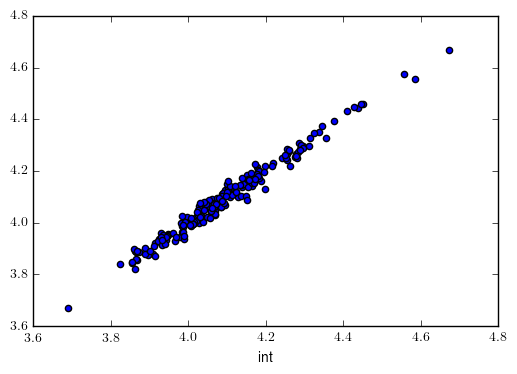

In [12]:
def log10(a):
    return np.log(a) / np.log(10)

plt.scatter(log10(tmp.lum[:200]), log10(tmp.lum_obs[:200]))
plt.xlabel('int')

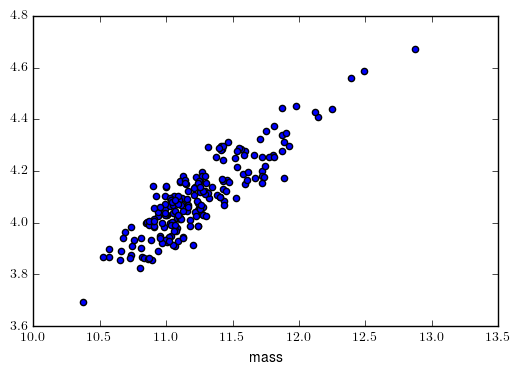

In [14]:
plt.scatter(log10(tmp.mass[:200]), log10(tmp.lum[:200]))
plt.xlabel('mass')

In [19]:
from scipy.stats import norm,lognorm

np.random.seed(0)
alpha1 = norm(10.709, 0.022).rvs()
alpha2 = norm(0.359, 0.009).rvs()
alpha3 = 2.35e14
alpha4 = norm(1.10, 0.06).rvs()
S = norm(0.155, 0.0009).rvs()
mass = tmp.mass
z = tmp.z
sigma_L = 0.05
mu_li = np.exp(alpha1) * ((mass / alpha3) ** (alpha2))* ((1+z) ** (alpha4))
li = lognorm(S, scale=mu_li).rvs()
observed = lognorm(sigma_L, scale=li).rvs()

In [23]:
li[0]

13777.036438643296

In [22]:
mu_li[0]

10275.528486572946

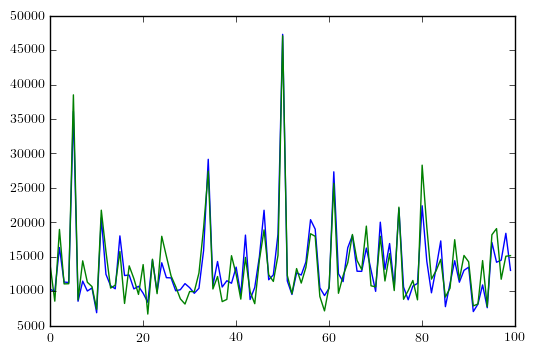

In [24]:
plt.plot(mu_li[:100])
plt.plot(li[:100])

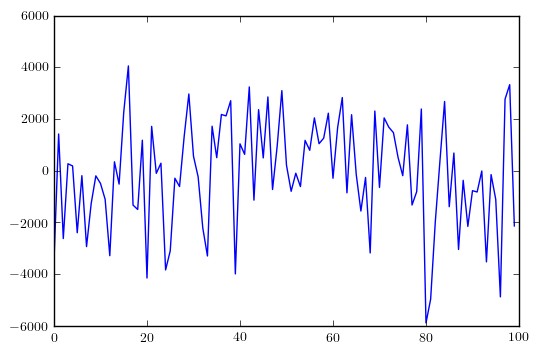

In [25]:
plt.plot(mu_li[:100] - li[:100])

In [27]:
mu_li[0] - li[0]

-3501.5079520703493

In [29]:
lspace = np.linspace(5000, 15000, 1000)

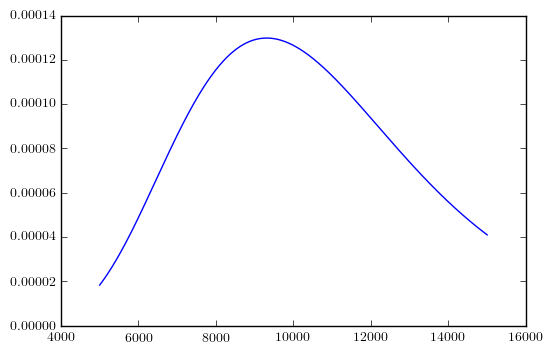

In [34]:
plt.plot(lspace, lognorm(S*2, scale=mu_li[0]).pdf(lspace))

In [35]:
lognorm(S * np.linspace(1,10,10), scale=mu_li[0]).pdf(li[0])

array([  3.22439230e-05,   5.96263284e-05,   5.06449017e-05,
         4.13440597e-05,   3.43988332e-05,   2.92832376e-05,
         2.54245781e-05,   2.24328465e-05,   2.00546686e-05,
         1.81231850e-05])